# Green Bay Packers Career Rushing Yards Leaders by Year
<img src="Packerlogo.png" align='left' width="200" length="200" />

In [13]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
import matplotlib.colors as mc
import colorsys
from random import randint
import re
%matplotlib inline

In [14]:
#import the file into Python 
rushing_yds=pd.read_excel('Packers_Top_RushingYds.xlsx')

In [15]:
rushing_yds

,Year,Player,Rushing Yards,Years Played
0,2019,Ahman Green,8322,"2000-2006,2009"
1,2019,Jim Taylor,8207,1958-1966
2,2019,John Brockington,5024,1971-1977
3,2019,Tony Canadeo,4197,1941-1952
4,2019,Ryan Grant,4143,2007-2012
...,...,...,...,...
873,1932,Herdis McCrary,152,1929-1933
874,1932,Arnie Herber,149,1930-1940
875,1932,Johnny (Blood) McNally,130,1929-1936
876,1932,Verne Lewellen,115,1924-1932


In [16]:
rushing_yds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 4 columns):
Year             878 non-null int64
Player           878 non-null object
Rushing Yards    878 non-null int64
Years Played     878 non-null object
dtypes: int64(2), object(2)
memory usage: 27.6+ KB


In [17]:
#sort values in desc order by year and yards
rushing_yds=rushing_yds.sort_values(by=['Year','Rushing Yards'], ascending=False)

In [18]:
#variable to set the desired year to show
year=2019

In [19]:
#create new dataframe containing single year as indicated by 'year' variable
rushing_yds_year=rushing_yds[rushing_yds['Year'].eq(year)]

In [20]:
rushing_yds_year

,Year,Player,Rushing Yards,Years Played
0,2019,Ahman Green,8322,"2000-2006,2009"
1,2019,Jim Taylor,8207,1958-1966
2,2019,John Brockington,5024,1971-1977
3,2019,Tony Canadeo,4197,1941-1952
4,2019,Ryan Grant,4143,2007-2012
5,2019,Dorsey Levens,3937,1994-2001
6,2019,Clarke Hinkle,3860,1932-1941
7,2019,Gerry Ellis,3826,1980-1986
8,2019,Paul Hornung,3711,1957-1966
9,2019,Eddie Lacy,3435,2013-2016


Text(0.5, 1.0, 'Top 10 Career Packers Rushing Yards Leaders in 2019')

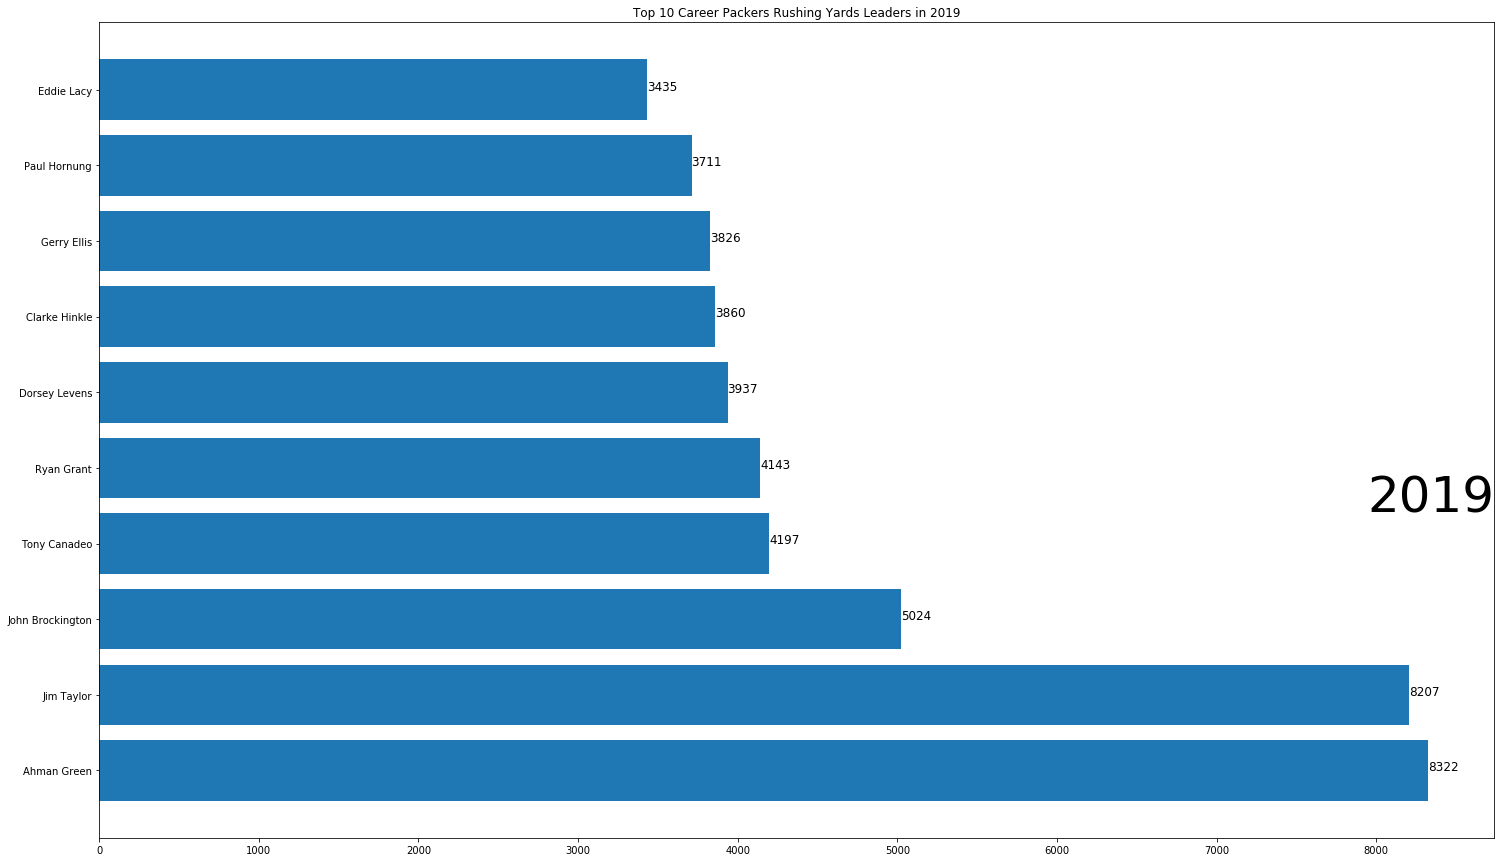

In [21]:
fig, ax = plt.subplots(figsize=(25, 15))
#horizontal bar graph of player and yards
ax.barh(rushing_yds_year['Player'], rushing_yds_year['Rushing Yards'])
#loop to put text of yards total after the bar
for i, (total, Player) in enumerate(zip(rushing_yds_year['Rushing Yards'], rushing_yds_year['Player'])):
    ax.text(total, i,   total, ha='left', color = 'black', size = 12)
#Putting a bigger year label on the right of graph to make it more obvious what year the data is showing
ax.text(1, 0.4, year, transform=ax.transAxes, size=50, ha='right')
ax.set_title('Top 10 Career Packers Rushing Yards Leaders in' + ' ' + str(year))

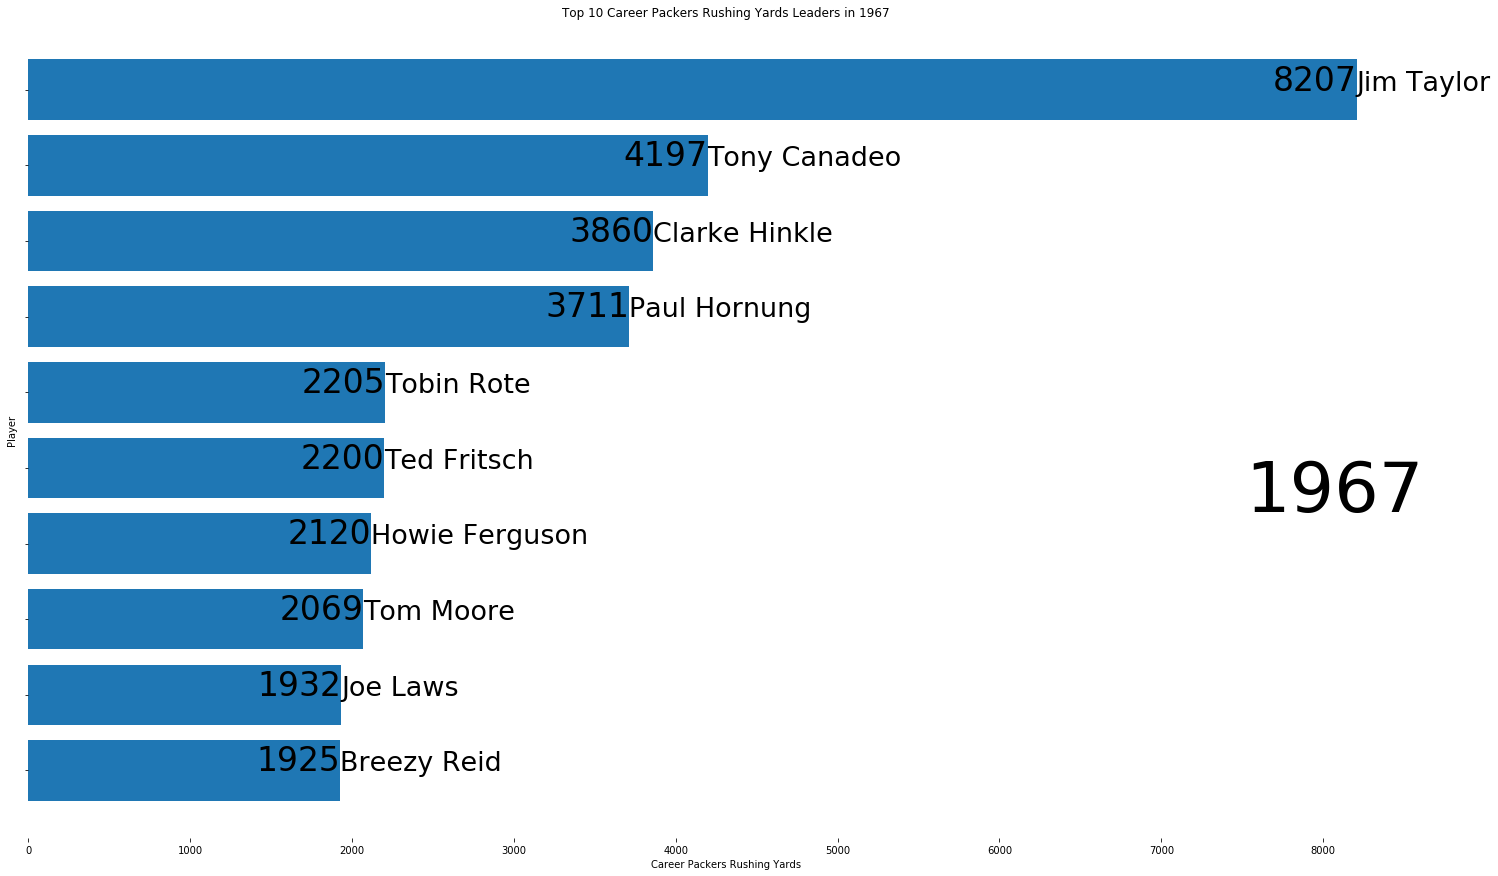

In [22]:
fig, ax = plt.subplots(figsize=(25, 15))
#create function to draw bar chart and pass year variable as argument
def draw_barchart(year):
    rushing_yds_year=rushing_yds[rushing_yds['Year'].eq(year)]
    rushing_yds_year = rushing_yds_year[::-1]
    ax.clear()
    #horizontal bar graph of player and yards
    ax.barh(rushing_yds_year['Player'], rushing_yds_year['Rushing Yards'])
    #loop to put text of player after bar and yards in bar
    for i, (total,Player) in enumerate(zip(rushing_yds_year['Rushing Yards'], rushing_yds_year['Player'])):
        ax.text(total, i,   total, ha='right', color = 'black', size = 33)
        ax.text(total, i,   Player, ha='left', color = 'black', size = 27)
    #Putting a bigger year label on the right of graph to make it more obvious what year the data is showing
    ax.text(1, 0.4, year, transform=ax.transAxes, size=70, ha='right')
    ax.set_xlabel('Career Packers Rushing Yards')
    ax.set_ylabel('Player')
    ax.set_title('Top 10 Career Packers Rushing Yards Leaders in' + ' ' + str(year))
     #don't include y axis lables
    ax.set_yticklabels([])
    plt.box(False)
    
#calling function with the year 1967    
draw_barchart(1967)    

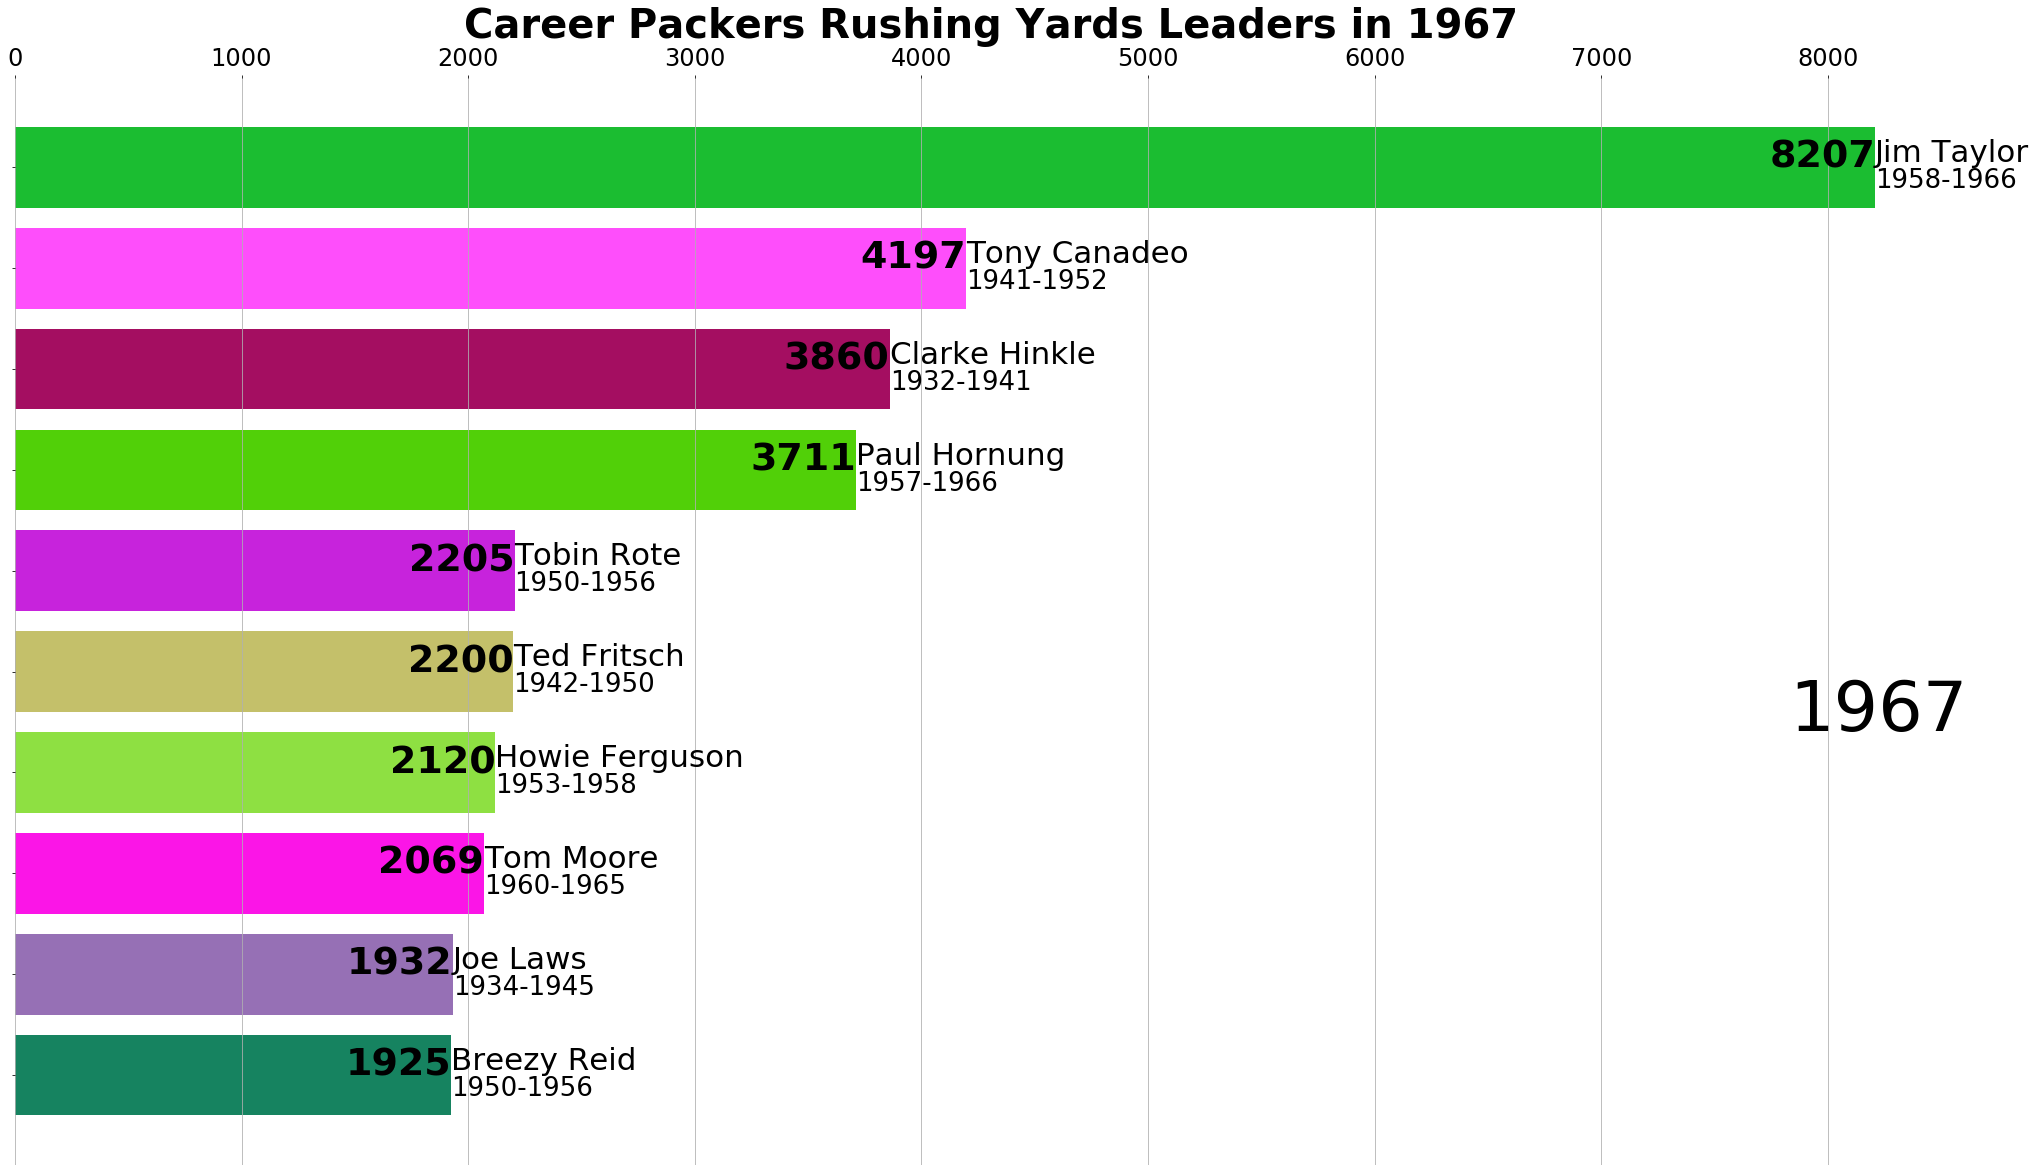

In [23]:
#Code to assign each player a different color and keep them consistent if the years are changed
def transform_color(color, amount = 0.5):
    try:
        c = mc.cnames[color]
    except:
        c = color
        c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], 1 - amount * (1 - c[1]), c[2])

all_names = rushing_yds['Player'].unique().tolist()
random_hex_colors = []
for i in range(len(all_names)):
    random_hex_colors.append('#' + '%06X' % randint(0, 0xFFFFFF))
    
    

rgb_colors = [transform_color(i, 1) for i in random_hex_colors]

#Create figure and call the draw_barchart function
fig, ax = plt.subplots(figsize=(35, 20))
def draw_barchart(year):
    rushing_yds_year=rushing_yds[rushing_yds['Year'].eq(year)]
    rushing_yds_year = rushing_yds_year[::-1]
    ax.clear()
    
    bar_colors = dict(zip(rushing_yds['Player'].unique(), rgb_colors))
    
    ax.barh(rushing_yds_year['Player'], rushing_yds_year['Rushing Yards'], color = [bar_colors[i] for i in rushing_yds_year['Player']])
    #loop to put text of yards after bar and player/years played inside bar
    for i, (total,Player, YearsPlayed) in enumerate(zip(rushing_yds_year['Rushing Yards'], rushing_yds_year['Player'], rushing_yds_year['Years Played'])):
         ax.text(total, i,   total, ha='right', color = 'black', weight=600, size = 38)
         ax.text(total, i,   Player, ha='left', color = 'black', size = 31, va='bottom')
         ax.text(total, i,   YearsPlayed, ha='left', color = 'black', size = 26, va='top')
    #Putting a bigger year label on the right of graph to make it more obvious what year the data is showing
    ax.text(1, 0.4, year, transform=ax.transAxes, size=70, ha='right')
    
    ax.xaxis.set_ticks_position('top')
    
    plt.tick_params(labelsize = 24)
    
    ax.set_title('Career Packers Rushing Yards Leaders in' + ' ' + str(year), size = 40, weight=600)
    ax.set_yticklabels([])
    plt.box(False)
    ax.grid(which='major', axis='x', linestyle='-')
    
#calling function with the year 1967   
draw_barchart(1967)   

In [24]:
##Code to run for animation launch and control - Replacing with a recorded animated gif for ease of visualizing in notebook

#fig, ax = plt.subplots(figsize=(35, 25)) 
#using animation library to call function at regular intervals (speed) controlled by interval amount and selected range(years)
#animator = animation.FuncAnimation(fig, draw_barchart, frames=range(1932, 2020), interval = 1200)
#HTML(animator.to_jshtml()) 
#<img src="Packers_Top_RushingYds.gif" align='left' width=900  height=600 />

<img src="Packers_Top_Rushing_Yds_By_Year.gif" align='left' width="900"  height="600" />